# GRADIENT DESCENT PROJECT

PART 1: PLOTTING NOISES CENTERED AT TWO DIFFERENT POINTS AND PERFORMING LINEAR REGRESSION (GRADIENT DESCENT)

In [78]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#GAUSSIAN SCATTER PLOTS
class1 = np.random.randn(100,2) + np.array([5,5])  #100 normally distributed values, 2 features, centered at 5,5
class2 = np.random.randn(100,2) + np.array([10,10])#100 normally distributed values, 2 features, centered at 10,10
X = np.vstack ((class1,class2)) #200x2 combined samples
Y = np.vstack ((np.ones((100,1)), np.zeros((100,1)))) #y=1 for class1, y=0 for class 2


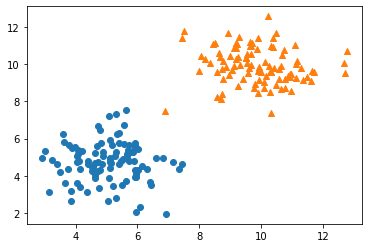

In [79]:
#PLOTTING PLOT OF TWO GAUSSIAN SCATTERS
fig = plt.figure()
ax1 = fig.add_subplot(111)

#PLOT SCATTER GRAPHS
ax1.scatter(X[0:100,0],X[0:100,1],marker='o')
ax1.scatter(X[100:200,0],X[100:200,1],marker='^')
plt.show()

weights: [[0.2553423 ]
 [1.06168803]]
The best error is: 50.001366395790704


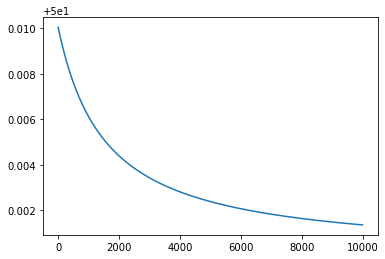

In [80]:
#GRADIENT DESCENT FOR PLOT 1

#INITIALIZATION
from mpl_toolkits.mplot3d import Axes3D
alpha = 0.1
iterations = 10000
m = X.shape[0]
width1 = 1
W0 = np.random.rand(X.shape[1],width1)
w = np.zeros((2,200))
E = np.zeros(iterations,)

#GRADIENT DESCENT
for itera in range(iterations):
    Z1 = np.dot(X,W0)
    a1 = 1/(1+np.exp(-Z1)) #sigmoid activation function of output neuron
    Yhat = a1 #nnet output
    d = Yhat - Y #delta
    E[itera] = np.sum (0.5*(d**2)) #MSE (not needed)
    g1 = a1*(1-a1) #derivative of sigmoid
    dEdW0 = np.dot(X.T, d * g1) #dE/dW
    W0 -= alpha/m*dEdW0 
print('weights:',W0)
print('The best error is:',np.min(E))
plt.plot(range(iterations),E)

PART 2: PLOTTING NOISE CENTERED AT THREE DIFFERENT POINTS AND PERFORMING GRADIENT DESCENT

NEURAL NETWORK WITH 4 INPUT NEURONS AND 3 OUTPUT NEURONS

In [81]:
#DIVIDING INTO CLASSES
width1 = 4 #4 input neurons
width2 = 3 #3 output neurons
class3 = np.random.randn(100,2) + np.array([5, 10])        # we will use the same class1 and class2 from number 1
X = np.vstack((class1, class2, class3))                    # X is the vertical stack of all the classes
Y = np.vstack((np.zeros((100,1))+([1,0,0]),                # for one-hot encoding
    np.zeros((100,1))+([0,1,0]),
    np.zeros((100,1))+([0,0,1])))

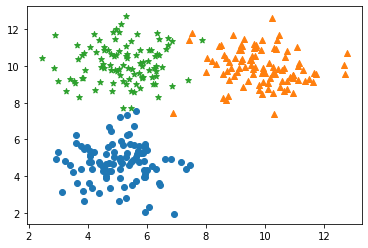

In [82]:
#CREATING NEW DATA
#PLOTTING THREE SCATTERS

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X[:100,0],X[:100,1],marker='o')
ax.scatter(X[100:200,0],X[100:200,1],marker='^')
ax.scatter(X[200:,0],X[200:,1],marker='*')

<function matplotlib.pyplot.show(close=None, block=None)>

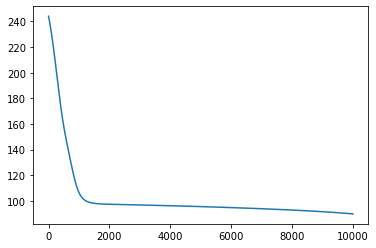

In [83]:
#GRADIENT DESCENT FOR PLOT 2

#INITIALIATION
W0 = np.random.rand(X.shape[1],width1)
W1 = np.random.rand(width1+1,width2)
iterations = 10000
alpha = 0.01
m = X.shape[0] #number of samples
E = np.zeros(iterations,) #initialize error vector (not needed)
Yhat = 0

#GRADIENT DESCENT
for itera in range(iterations):
    Z1 = np.dot(X,W0) #1st layer
    a1 = 1/(1+np.exp(-Z1)) #sigmoid activation function of hidden layer
    a1 = np.hstack((np.ones((m,1)),a1)) 
    Z2 = np.dot(a1,W1)
    a2 = 1/(1+np.exp(-Z2)) #sigmoid activation function of output layer
    Yhat = a2 #nnet output
    d = Yhat - Y #delta
    E[itera] = np.sum (0.5*(d**2)) #MSE (not needed)
    g1 = a1*(1-a1) #sigm derivative of layer 1
    g1[:,0] = 1 #gradient of bias
    g2 = a2*(1-a2) #sigm derivative of layer 2
    dEdW1 = np.dot(a1.T, d * g2)
    dEdW0 = np.dot( X.T, g1[:,1:] * np.dot(d * g2 , W1[1:,:].T))
    W0 -= alpha/m*dEdW0 #update weights
    W1 -= alpha/m*dEdW1
#print(np.round(Yhat)) #display results
#print('weights:', W0,W1)
#print('error:',np.min(E))
plt.plot(range(itera+1),E)
plt.show

PART 3: PLOTTING NOISE CENTERED AT THREE DIFFERENT POINTS AND PERFORMING GRADIENT DESCENT

NEURAL NETWORK WITH 2 INPUT NEURONS, 2 HIDDEN LAYERS, AND 3 OUTPUT NEURONS

ALL LAYERS USE SIGMOID ACTIVATION FUNCTION

In [84]:
#CREATING A NEURAL NETWORK
width0 = 2   #input neurons
width1 = 4   #hidden layer 1
width2 = 4   #hidden layer 2
width3 = 3   #output layer classes

#DIVIDING BY CLASSES
X = np.vstack((class1, class2, class3))         # X is the vertical stack of all the classes
Y = np.vstack((np.zeros((100,1))+([1,0,0]),    # for one-hot encoding
    np.zeros((100,1))+([0,1,0]),
    np.zeros((100,1))+([0,0,1])))

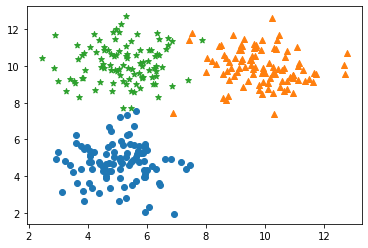

In [85]:
#PLOTTING THREE SCATTERS
fig = plt.figure()                    # same plot from number 2 because it is the same data
ax = fig.add_subplot(111)
ax.scatter(X[:100,0],X[:100,1],marker='o')
ax.scatter(X[100:200,0],X[100:200,1],marker='^')
ax.scatter(X[200:,0],X[200:,1],marker='*')

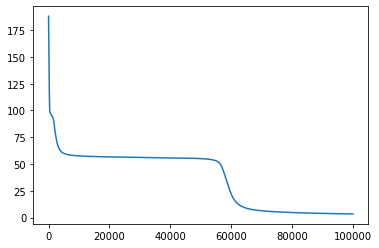

In [86]:
# GRADIENT DESCENT FOR PLOT 3
#HIDDEN LAYER 1 WITH SIGMOID ACTIVATION
#HIDDEN LAYER 2 WITH SIGMOID ACTIVAITON
#OUTPUT LAYER WITH SIGMOID ACTIVATION

W0 = np.random.randn(width0, width1)
b0 = np.zeros((1, width1))
W1 = np.random.randn(width1, width2)
b1 = np.zeros((1, width2))
W2 = np.random.randn(width2, width3)
b2 = np.zeros((1, width3))

itera = 100000
alpha = 0.05
m = X.shape[0] #number of samples
E = np.zeros(itera,) #initialize error vector (not needed)
for epoc in range(itera):
 Z1 = np.dot(X,W0)+b0 #1st layer (output)
 a1 = 1/(1+np.exp(-Z1)) #sigmoid activation of hidden layer 1
 Z2 = np.dot(a1,W1)+b1
 a2 = 1/(1+np.exp(-Z2)) #sigmoid activation of hidden layer 2
 Z3 = np.dot(a2,W2)+b2
 a3 = 1/(1+np.exp(-Z3)) #sigmoid activation of output, layer 3
 Yhat = a3 #nnet output
 d = Yhat - Y #delta
 E[epoc] = np.sum (0.5*(d**2)) #MSE (not needed)
 g1 = a1*(1-a1) #sigm derivative of layer 1
 g2 = a2*(1-a2)
 g3 = a3*(1-a3)
 dEda3 = d * g3
 dEda2 = np.dot(dEda3 , W2.T) * g2
 dEda1 = np.dot(dEda2 , W1.T) * g1
 dEdW2 = np.dot(a2.T, dEda3)
 dEdb2 = np.sum(dEda3, axis=0, keepdims=True)
 dEdW1 = np.dot( a1.T,dEda2)
 dEdb1 = np.sum(dEda2, axis=0)
 dEdW0 = np.dot( X.T, dEda1)
 dEdb0 = np.sum(dEda1, axis=0)
 W0 += -alpha/m * dEdW0
 b0 += -alpha/m * dEdb0
 W1 += -alpha/m * dEdW1
 b1 += -alpha/m * dEdb1
 W2 += -alpha/m * dEdW2
 b2 += -alpha/m * dEdb2
#print(np.round(Yhat)) #display results
#print('biases:',b0, b1, b2)
#print('weights:',W0,W1,W2)
#print('best error:',np.min(E))
plt.plot(range(epoc+1),E)

PART 4

SAME AT PART 3 EXCEPT OUTPUT LAYER USES SOFTMAX ACTIVATION FUNCTION

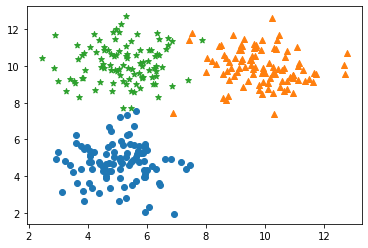

In [94]:
# PLOTTING THREE SCATTERS
width0 = 2   #input neurons
width1 = 4   #hidden layer 1
width2 = 4   #hidden layer 2
width3 = 3   #output layer classes
X = np.vstack((class1, class2, class3))         # X is the vertical stack of all the classes
Y = np.vstack((np.zeros((100,1))+([1,0,0]),    # for one-hot encoding
    np.zeros((100,1))+([0,1,0]),
    np.zeros((100,1))+([0,0,1])))

Y = np.hstack((np.ones((300,1)),Y))

fig = plt.figure()                    # same plot from number 2 and 3 because it is the same data
ax = fig.add_subplot(111)
ax.scatter(X[:100,0],X[:100,1],marker='o')
ax.scatter(X[100:200,0],X[100:200,1],marker='^')
ax.scatter(X[200:,0],X[200:,1],marker='*')

error: 6.526378502690412


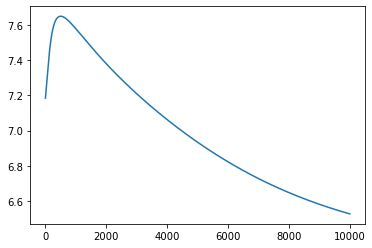

In [95]:
#GRADIENT DESCENT FOR PLOT 4
#HIDDEN LAYER 1 WITH SIGMOID ACTIVATION
#HIDDEN LAYER 2 WITH SIGMOID ACTIVAITON
#OUTPUT LAYER WITH SOFTMAX ACTIVATION

W0 = np.random.randn(width0, width1)
b0 = np.zeros((1, width1))
W1 = np.random.randn(width1, width2)
b1 = np.zeros((1, width2))
W2 = np.random.randn(width2, width3)
b2 = np.zeros((1, width3))

itera = 10000
alpha = 0.001
m = X.shape[0] #number of samples
E = np.zeros(itera,) #initialize error vector (not needed)
L = E #log likelihood, aka loss (also not needed)
for epoc in range(itera):
    Z1 = np.dot(X,W0)+b0 #1st layer (output)
    a1 = 1/(1+np.exp(-Z1)) #sigmoid activation function of hidden layer
    Z2 = np.dot(a1,W1)+b1
    a2 = 1/(1+np.exp(-Z2))
    Z3 = np.dot(a2,W2)+b2
    expo = np.exp(Z2-np.max(Z2)) #softmax numerator. subtract to stabilize.
    a3 = expo/ np.sum(expo,axis=1,keepdims=True) #softmax activation.
    Yhat = a3 #nnet output
    d = Yhat - Y #delta
    E[epoc] = np.sum (0.5*(d**2)) #MSE (not needed)
    L[epoc] = np.sum(-np.log(a3))/m #loss
    g1 = a1*(1-a1) #sigm derivative of layer 1
    g2 = a2*(1-a2)
    g3 = 1           # ignoring derivative for softmax function
    dLdW2 = np.dot(a2.T, d[:,1:4] * g3)
    dLdb2 = np.sum(d[:,1:4] * g3, axis=0, keepdims=True)
    dLdW1 = np.dot(a1.T, d * g2)
    dLdb1 = np.sum(d * g2, axis=0, keepdims=True) #same as: np.dot(np.ones((m,1)).T, d * g2))
    dLdW0 = np.dot( X.T, g1 * np.dot(d * g2 , W1.T))
    dLdb0 = np.sum(np.dot (d*g2, W1.T) * g1, axis=0, keepdims=True)
    #same as: np.dot( np.ones((m,1)).T, g1 * np.dot(d * g2 , W1.T))
    W0 += -alpha/m * dLdW0
    b0 += -alpha/m * dLdb0
    W1 += -alpha/m * dLdW1
    b1 += -alpha/m * dLdb1
    W2 += -alpha/m * dLdW2
    b2 += -alpha/m * dLdb2

#print(np.argmax(Yhat,axis=1)) #display results
print('error:', np.min(E))
plt.plot(range(epoc+1),E)